In [1]:
import cv2 as cv
print( cv.__version__ )

4.5.1


In [6]:
import cv2
import numpy as np

img = cv2.imread('cat.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.0001, 10)
corners = np.int0(corners)

In [7]:
squeezed = corners.squeeze().tolist()

print(squeezed)

[[372, 11], [23, 11], [270, 334], [34, 273], [64, 298], [21, 247], [183, 360], [87, 309], [362, 273], [332, 298], [125, 335], [317, 36], [375, 247], [236, 346], [304, 311], [349, 15], [79, 36], [14, 24], [212, 362], [371, 124], [47, 15], [287, 321], [372, 194], [160, 344], [98, 315], [300, 49], [23, 193], [96, 49], [23, 115], [368, 179], [381, 24], [270, 69], [110, 322], [371, 258], [315, 306], [374, 111], [359, 9], [347, 288], [117, 63], [63, 24], [36, 9], [49, 287], [26, 128], [285, 58], [223, 356], [332, 25], [27, 179], [383, 34], [381, 69], [19, 103], [17, 80], [174, 354], [15, 69], [27, 262], [258, 340], [376, 205], [19, 205], [379, 80], [12, 34], [138, 340], [126, 69], [74, 302], [383, 53], [13, 52], [30, 145], [378, 94], [225, 66], [19, 90], [172, 66], [240, 68], [155, 68], [366, 145], [247, 341], [17, 215], [142, 69], [306, 322], [378, 215], [257, 69], [368, 83], [17, 234], [31, 164], [379, 234], [368, 162], [383, 264], [153, 355], [145, 327], [351, 275], [383, 135], [200, 360]

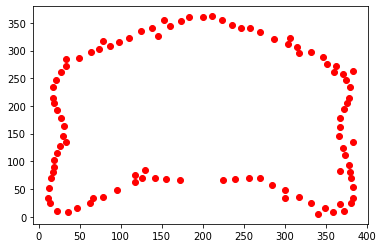

In [9]:
import matplotlib.pyplot as plt
squeezed = corners.squeeze().tolist()

x_squeezed = np.array([i[0] for i in squeezed])
y_squeezed = np.array([i[1] for i in squeezed])

plt.plot(x_squeezed, y_squeezed, 'ro')

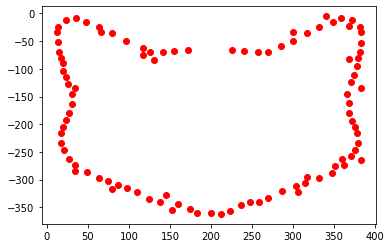

In [10]:
plt.plot(x_squeezed, -y_squeezed, 'ro')

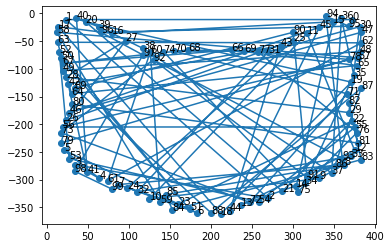

In [11]:
matrix = np.array([x_squeezed, -y_squeezed])

plt.plot(matrix[0], matrix[1], marker='o')
for index, coord in enumerate(matrix[0]):
    plt.text(coord, matrix[1][index], str(index))

In [12]:
    """
    вычисление оптимального маршрута
    """
def distance(P1, P2):
    """
    This function computes the distance between 2 points defined by
     P1 = (x1,y1) and P2 = (x2,y2) 
    """
    return ((P1[0] - P2[0])**2 + (P1[1] - P2[1])**2) ** 0.5


def optimized_path(coords, start=None):
    """
    This function finds the nearest point to a point
    coords should be a list in this format coords = [ [x1, y1], [x2, y2] , ...] 

    """
    if start is None:
        start = coords[0]
    pass_by = coords
    path = [start]
    pass_by.remove(start)
    while pass_by:
        nearest = min(pass_by, key=lambda x: distance(path[-1], x))
        path.append(nearest)
        pass_by.remove(nearest)
    return path

In [13]:
print(squeezed)

[[372, 11], [23, 11], [270, 334], [34, 273], [64, 298], [21, 247], [183, 360], [87, 309], [362, 273], [332, 298], [125, 335], [317, 36], [375, 247], [236, 346], [304, 311], [349, 15], [79, 36], [14, 24], [212, 362], [371, 124], [47, 15], [287, 321], [372, 194], [160, 344], [98, 315], [300, 49], [23, 193], [96, 49], [23, 115], [368, 179], [381, 24], [270, 69], [110, 322], [371, 258], [315, 306], [374, 111], [359, 9], [347, 288], [117, 63], [63, 24], [36, 9], [49, 287], [26, 128], [285, 58], [223, 356], [332, 25], [27, 179], [383, 34], [381, 69], [19, 103], [17, 80], [174, 354], [15, 69], [27, 262], [258, 340], [376, 205], [19, 205], [379, 80], [12, 34], [138, 340], [126, 69], [74, 302], [383, 53], [13, 52], [30, 145], [378, 94], [225, 66], [19, 90], [172, 66], [240, 68], [155, 68], [366, 145], [247, 341], [17, 215], [142, 69], [306, 322], [378, 215], [257, 69], [368, 83], [17, 234], [31, 164], [379, 234], [368, 162], [383, 264], [153, 355], [145, 327], [351, 275], [383, 135], [200, 360]

In [14]:
path = optimized_path(squeezed)
print(path)

[[372, 11], [368, 23], [381, 24], [383, 34], [383, 53], [381, 69], [379, 80], [368, 83], [378, 94], [374, 111], [371, 124], [383, 135], [366, 145], [368, 162], [368, 179], [372, 194], [376, 205], [378, 215], [379, 234], [375, 247], [371, 258], [360, 262], [362, 273], [351, 275], [347, 288], [332, 298], [317, 296], [315, 306], [304, 311], [306, 322], [287, 321], [270, 334], [258, 340], [247, 341], [236, 346], [223, 356], [212, 362], [200, 360], [183, 360], [174, 354], [160, 344], [153, 355], [138, 340], [125, 335], [110, 322], [98, 315], [87, 309], [79, 317], [74, 302], [64, 298], [49, 287], [34, 285], [34, 273], [27, 262], [21, 247], [17, 234], [17, 215], [19, 205], [23, 193], [27, 179], [31, 164], [30, 145], [34, 135], [26, 128], [23, 115], [19, 103], [19, 90], [17, 80], [15, 69], [13, 52], [12, 34], [14, 24], [23, 11], [36, 9], [47, 15], [63, 24], [66, 34], [79, 36], [96, 49], [117, 63], [126, 69], [117, 75], [130, 84], [142, 69], [155, 68], [172, 66], [225, 66], [240, 68], [257, 69]

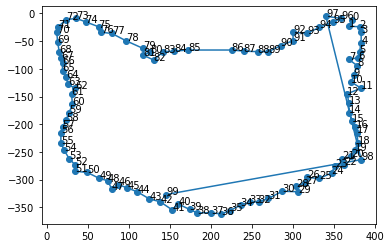

In [15]:
x = np.array([i[0] for i in path])
y = np.array([i[1] for i in path])

matrix = np.array([x, -y])

plt.plot(matrix[0], matrix[1], marker='o')
for index, coord in enumerate(matrix[0]):
    plt.text(coord, matrix[1][index], str(index))

In [21]:
import geopandas as gpd

import geojson

meters = 10


# Координаты в системе координат EPSG:3857
x_original_point = 4173551.0
y_original_point = 7529089.9

mx = x * meters + x_original_point
my = y * -meters + y_original_point

mxy = list(zip(mx,my))

picture_df = gpd.GeoDataFrame(
    {'id': range(0, len(mxy))}, 
    crs="EPSG:3857", 
    geometry=[Point(resu) for resu in mxy]
)

picture_df['geometry'] = picture_df['geometry'].to_crs(epsg=4326)

picture_df.to_file("cat.geojson", driver='GeoJSON', encoding="utf-8")

ModuleNotFoundError: No module named 'geopandas'